# **Data Preprocessing Project: Impact Of Feature Scaling on Model's Performance**
In this project, I discuss various data preprocessing techniques related to feature scaling.
## Table of Contents
1. [What Feature Scaling is?](#what-feature-scaling-is?)
2. [Different Methods of Feature Scaling](#methods-of-feature-scaling)
    1. [Standardization](#standardization)
    2. [Normalization](#normalization)
3. [Best Practices of Scaling](#best-practices-and-selection-criteria)


# **1. What Feature Scaling is?**
<a id="what-feature-scaling-is?"></a>
Feature scaling is a data preprocessing technique used in Machine Learning to standardize or normalize the range of independent variables or features of data. Feature scaling normalizes entire features in a similar range.

**↪** It is also known as **data normalization**.

# Why it Matters?
Feature Scaling brings all features in a similar range, to ensure each features contribute equally to training and no feature dominates over the other.

Let's assume, you have a dataset with three features: `Salary, Age, and IQ Level`. The Salary range from `30,000 to 80,000,` the Age range from `20 to 40,` while IQ Level range from `90 to 120.` So if you use these features without scaling them, your machine learning algorithm might give importance to the Salary feature, because it has a larger range and variance than the other two features. This could lead to biased and inaccurate model. So, you have to scale these features for better results.

Upon analyzing this example, you now have a better understanding of the feature scaling and why it is important.
<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*CWdxdIfma4O20wGIVVU7-g.png" width="650" height="650">

# **2. Different Methods of Feature Scaling:**
<a id="methods-of-feature-scaling"></a>

### <a id="standardization"></a>**1. Standardization**
Standardization, also known as **z-score Normalization.**

This technique transforms the features to have a `mean = 0` and a `standard deviation = 1`. It performs best when the distribution of data is not Gaussian(Normal).

$$
    Z = \frac{X - \bar{X}}{\sigma}
$$

In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('/Social_Network_Ads.csv')
df = df.iloc[::, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [2]:
X = df.iloc[::, 0:2]
y = df['Purchased']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Impact of Standard Scaling:

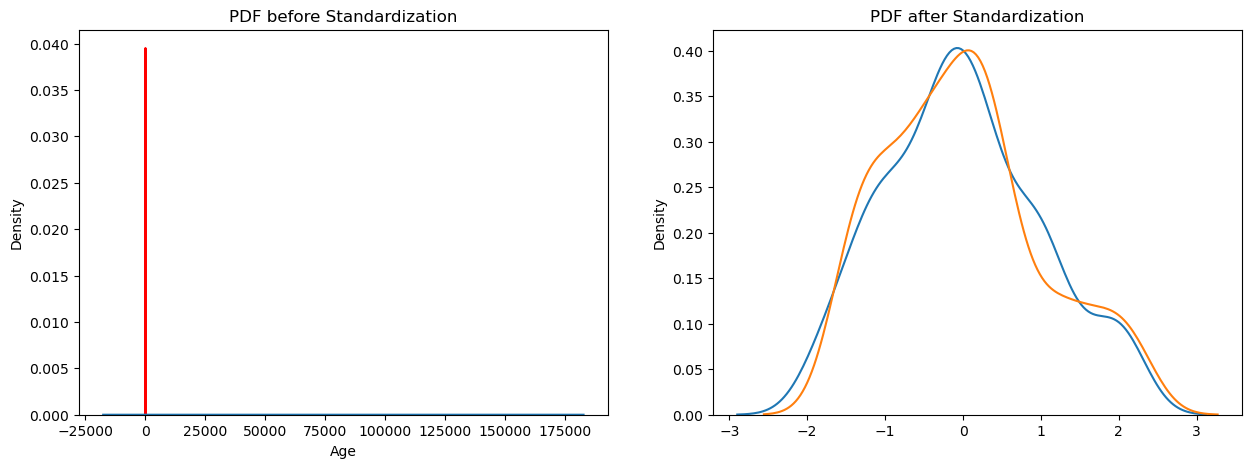

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(x_train['Age'],ax=axes[0],color='red')
sns.kdeplot(x_train['EstimatedSalary'], ax=axes[0], label='Fare')
axes[0].set_title("PDF before Standardization")

sns.kdeplot(x_train_scaled[:, 0], ax=axes[1])
sns.kdeplot(x_train_scaled[:, 1], ax=axes[1])
axes[1].set_title("PDF after Standardization");

##### **The mean of the distribution is very close to 0 and the standard deviation is 1. The outliers in fare are not affected by the scaling process.**

In [7]:
lr = LogisticRegression()

# training on actual/original data
lr.fit(x_train, y_train)
y_pred_ = lr.predict(x_test)
print("Accuracy score without Scaling: ", accuracy_score(y_pred_, y_test))

# training on scaled features
lr.fit(x_train_scaled, y_train)
y_pred_scaled = lr.predict(x_test_scaled)
print("Accuracy score using scaled Features: ", accuracy_score(y_pred_scaled, y_test))

Accuracy score without Scaling:  0.65
Accuracy score using scaled Features:  0.8625


### <a id="normalization"></a>**2. Normalization**
**↪**  Normalization re-scales values in the range of **`0-1`**,  while it doesn’t affect the original distribution and relationship of features. 

**↪** Normalization is also known as **`min-max normalizarion`** or **`min-max scaling`**. 

**↪** Some methods for Normalization:
- Min-Max Scaling
- Mean Normalization
- Max Absoultue Scaling
- Robust Scaling


## **↪** Min-Max Scaling:
Min-Max Scaling is useful when data doesn't follow a normal distribution.

$$
    X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

In [8]:
# lets take tips data from seaborn for normalization

from seaborn import load_dataset
tip_data = load_dataset('tips')
tip_data = tip_data[['total_bill', 'tip', 'size']]
tip_data.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [15]:
X = tip_data.iloc[::, 0:2]
y = tip_data['size']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

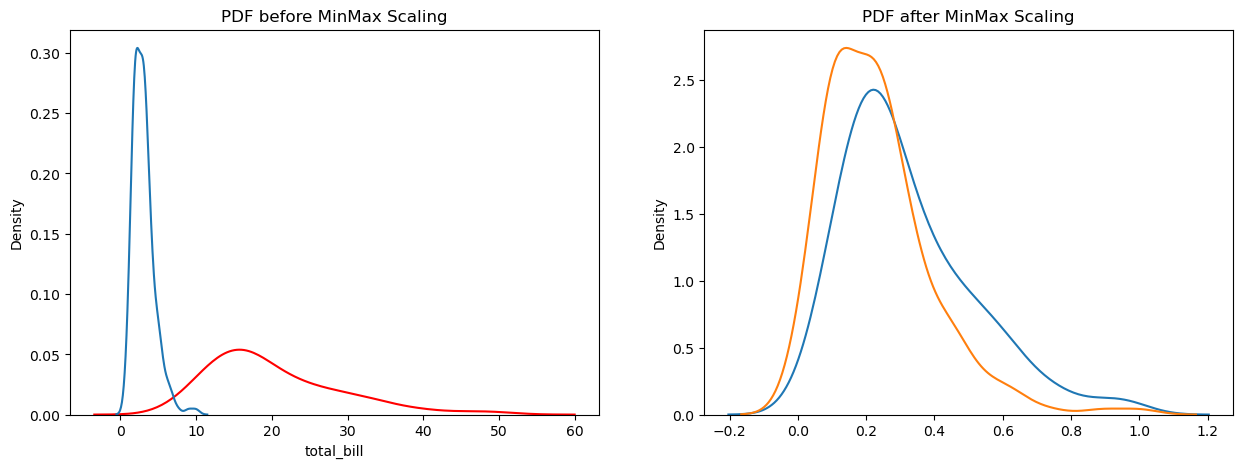

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(x_train['total_bill'],ax=axes[0],color='red')
sns.kdeplot(x_train['tip'], ax=axes[0], label='Fare')
axes[0].set_title("PDF before MinMax Scaling")

sns.kdeplot(x_train_scaled[:, 0], ax=axes[1])
sns.kdeplot(x_train_scaled[:, 1], ax=axes[1])
axes[1].set_title("PDF after MinMax Scaling");

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()

# training on actual/original data
dtree.fit(x_train, y_train)
y_pred1 = dtree.predict(x_test)
print("Accuracy score without Scaling: ", accuracy_score(y_pred1, y_test))

# training on scaled features
dtree.fit(x_train_scaled, y_train)
y_pred2 = dtree.predict(x_test_scaled)
print("Accuracy score using scaled : ", accuracy_score(y_pred2, y_test))

Accuracy score without Scaling:  0.4897959183673469
Accuracy score using scaled :  0.5102040816326531


### **3. Robust Scaling:**
Robust Scaler works well when there are outliers present in the data. Because it uses the **`median(x͂)`** and **`inter-quartile range(Q3 — Q1)`**, it absorbs the impact of outliers while scaling.

$$
    X^{'} = \frac{X - X_{median}}{I.Q.R}
$$

In [22]:
# Lets use the same tips dataset as there are outliers in features

In [23]:
tip_data = load_dataset('tips')
tip_data = tip_data[['total_bill', 'tip', 'size']]

X = tip_data.iloc[::, 0:2]
y = tip_data['size']
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

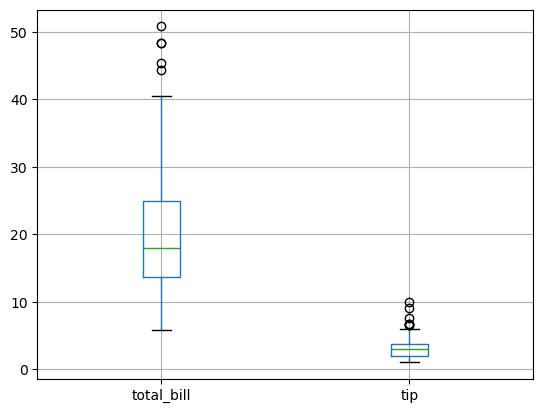

In [24]:
x_train.boxplot()
plt.show()

In [25]:
# The syntax for implementing scaling using RobustScaler in Scikit-Learn is given as follows:-

from sklearn.preprocessing import RobustScaler

rb = RobustScaler()

X_train_rb = rb.fit_transform(x_train)

X_test_rb = rb.transform(x_test)

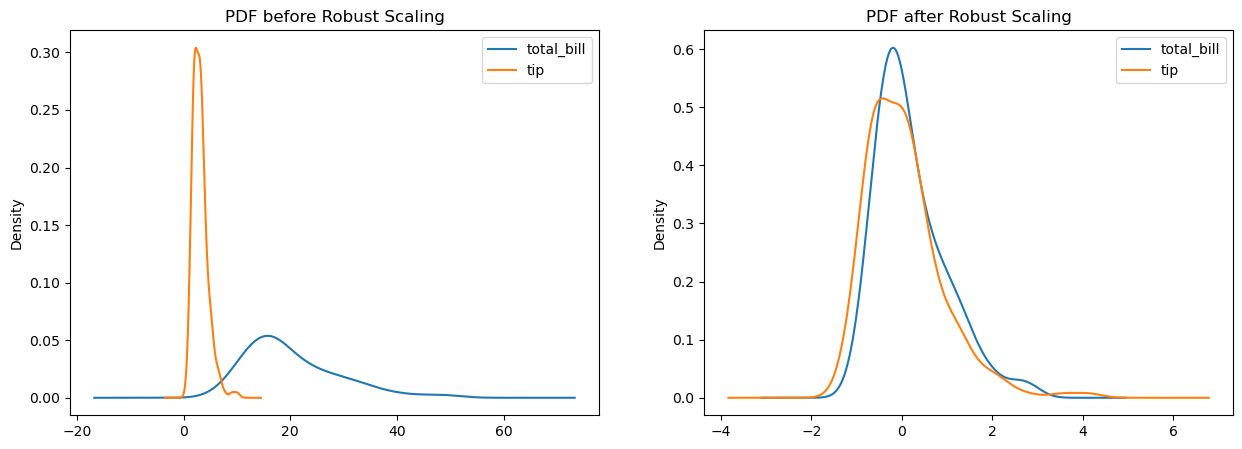

In [26]:
# fig, ax = plt.subplot(1,2,figsize=(10,5))
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

x_train.plot(kind= 'kde', ax=ax[0])
ax[0].set_title("PDF before Robust Scaling")
X_train_rb_df = pd.DataFrame(X_train_rb, columns=X.columns)
X_train_rb_df.plot(kind= 'kde', ax=ax[1])
ax[1].set_title("PDF after Robust Scaling");

##### **The data is scaled using the median and the interquartile range. The outliers are still visible in the scaled data, but they do not affect the scaling of the other values.**

### **4. Max-Abs Scaler:**
Max-Abs Scaler works very well in sparse data when most of the observations are 0. Max-Abs Scaler rescale each feature by its maximum absolute value. So, the maximum absolute value of each feature in the training set will be 1.0. 
$$
    X^{'} = \frac{X}{|X_{max}|}
$$

In [27]:
df_sparse = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(10, 1000),
    # negative skew 
    'x2': np.random.beta(10, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

In [28]:
df_sparse.head()

,x1,x2,x3
0,12.824323,32.543800,50.529662
1,7.523546,24.837153,51.840345
2,16.490833,36.803406,49.329115
3,15.906945,38.918029,54.304075
4,6.767796,36.575628,53.942979


In [29]:
# The syntax for implementing scaling using MaxAbsScaler in Scikit-Learn is given as follows:-

from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df_mabs = scaler.fit_transform(df_sparse)

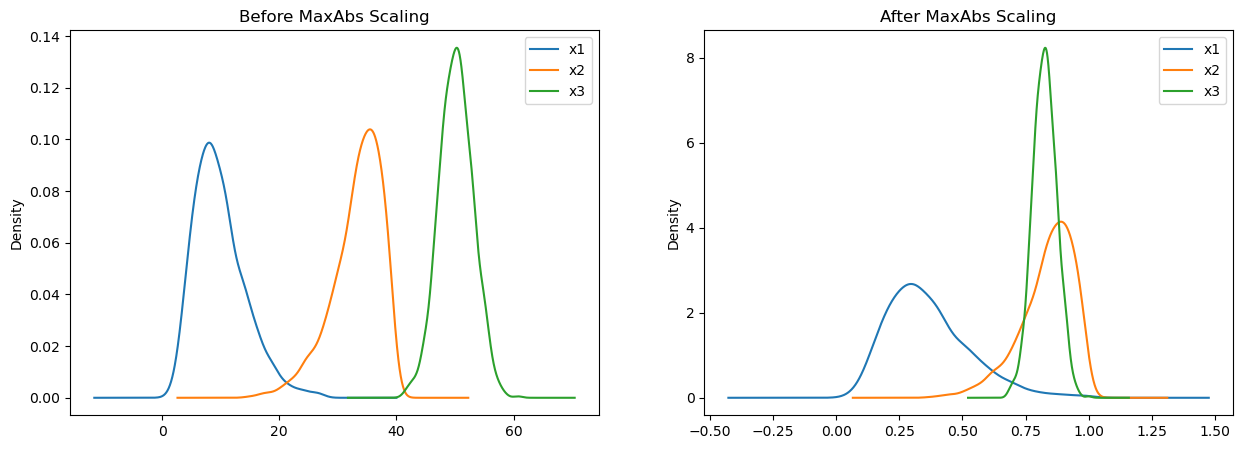

In [30]:
# fig, ax = plt.subplot(1,2,figsize=(10,5))
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

df_sparse.plot(kind= 'kde', ax=ax[0])
ax[0].set_title("Before MaxAbs Scaling")
df_mabs = pd.DataFrame(df_mabs, columns=df_sparse.columns)
df_mabs.plot(kind= 'kde', ax=ax[1])
ax[1].set_title("After MaxAbs Scaling");

# <a id="best-practices-and-selection-criteria"></a>**Best Practices of Scaling**

# Choosing the Right Scaling Method for Improved Models

| Feature Scaling Technique | When to Use                                                                                     | Characteristics                                                                                         |
|---------------------------|--------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| **Standard Scaler**       | - When the distribution of data is normal<br>- Models assume to have Gaussian (Normal) Distribution<br>- Models that rely on Gradient Descent method (Linear Regression and Logistic Regression)<br>- Sensitive to Outliers | - Assumes data follows a normal distribution.<br>- Sensitive to outliers.                              |
| **Max-Abs Scaler**        | - Suitable for sparse data, when most of the values are 0<br>- Sensitive to outliers             | - Works well with sparse data.<br>- Sensitive to outliers.                                             |
| **Robust Scaler**         | - When data has outliers, robust scaler performs best<br>- When data has skewed distribution      | - Performs well with outliers.<br>- Suitable for skewed data.                                          |
| **Min-Max Scaler**        | - When the distribution of data is not Gaussian (Normal)<br>- Algorithms requiring features to specific Range [0,1]<br>- Not suitable for sparse data<br>- Sensitive to outliers<br>- Perform best with Neural Networks and KNN | - Scales features to a given range, usually [0, 1].<br>- Sensitive to outliers.<br>- Not suitable for sparse data.<br>- Best for Neural Networks and KNN. |


## **Summary**


> Machine Learning revolves around experimentation, the more you get hands-on, the better your understanding of this field becomes. It’s similar to the trial and error method.
Scaling the input data before feeding it to a machine learning model is always a good practice.

### **Key Points:**
Scaling the input data before feeding it to a machine learning model is a best practice. Here are some key points to remember:

- **Scaling accelerates model convergence**: Properly scaled data can help models converge faster during training.
- **Normalization**: This technique scales data to a range between 0 and 1. It is particularly useful when the data does not follow a normal distribution.
- **Standardization**: This method scales data to have a mean of 0 and a standard deviation of 1. It is preferred for data with a normal or Gaussian distribution.
- **Robust Scaling**: This approach is beneficial when the data contains many outliers, as it uses statistics that are less sensitive to them.
- **Experimentation is key**: Often, the choice of scaling technique might not significantly affect the results, but it can in some cases. It’s good practice to try different scaling methods to see which works best for your specific dataset.
- **Only scale features, not labels**: Ensure that only the features (input variables) are scaled and not the target variable (labels).
- **Proper usage of scalers**: Do not fit the scaler on the test data. Fit the scaler only on the training data and then apply the transformation to the test data.
  - **Incorrect**: `scaler.fit_transform(X_test)`
  - **Correct**: `scaler.transform(X_test)`

Implementing these practices will help in building more efficient and reliable machine learning models.

For more in-depth understanding, consider exploring these resources:

1. https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/#:~:text=Feature%20scaling%20is%20a%20data,of%20features%20with%20larger%20values.
2. https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling